# 笹川真生とキタニタツヤの顔画像を見分けるAI(CNN)

笹川真生  
https://www.youtube.com/channel/UCd0oSpX1KiQ0pBl8g4XcwOQ/videos  
キタニタツヤ  
https://www.youtube.com/channel/UCgP3GbgbuVzAhlctGU5yuPA

# 前準備

In [1]:
import numpy as np
import pandas as pd
import os
import glob

In [2]:
path_mao = glob.glob("/kaggle/input/mao-img/*.jpg")
path_mao

['/kaggle/input/mao-img/mao(11).jpg',
 '/kaggle/input/mao-img/mao(155).jpg',
 '/kaggle/input/mao-img/mao(102).jpg',
 '/kaggle/input/mao-img/mao(68).jpg',
 '/kaggle/input/mao-img/mao(88).jpg',
 '/kaggle/input/mao-img/mao(112).jpg',
 '/kaggle/input/mao-img/mao(153).jpg',
 '/kaggle/input/mao-img/mao(34).jpg',
 '/kaggle/input/mao-img/mao(101).jpg',
 '/kaggle/input/mao-img/mao(160).jpg',
 '/kaggle/input/mao-img/mao(43).jpg',
 '/kaggle/input/mao-img/mao(169).jpg',
 '/kaggle/input/mao-img/mao(117).jpg',
 '/kaggle/input/mao-img/mao(17).jpg',
 '/kaggle/input/mao-img/mao(199).jpg',
 '/kaggle/input/mao-img/mao(197).jpg',
 '/kaggle/input/mao-img/mao(26).jpg',
 '/kaggle/input/mao-img/mao(120).jpg',
 '/kaggle/input/mao-img/mao(85).jpg',
 '/kaggle/input/mao-img/mao(182).jpg',
 '/kaggle/input/mao-img/mao(21).jpg',
 '/kaggle/input/mao-img/mao(167).jpg',
 '/kaggle/input/mao-img/mao(139).jpg',
 '/kaggle/input/mao-img/mao(86).jpg',
 '/kaggle/input/mao-img/mao(53).jpg',
 '/kaggle/input/mao-img/mao(116).jpg

In [3]:
path_kitani = glob.glob("/kaggle/input/kitani-img/*.jpg")
path_kitani

['/kaggle/input/kitani-img/kitani(4).jpg',
 '/kaggle/input/kitani-img/kitani(23).jpg',
 '/kaggle/input/kitani-img/kitani(16).jpg',
 '/kaggle/input/kitani-img/kitani(20).jpg',
 '/kaggle/input/kitani-img/kitani(51).jpg',
 '/kaggle/input/kitani-img/kitani(90).jpg',
 '/kaggle/input/kitani-img/kitani(47).jpg',
 '/kaggle/input/kitani-img/kitani(15).jpg',
 '/kaggle/input/kitani-img/kitani(10).jpg',
 '/kaggle/input/kitani-img/kitani(83).jpg',
 '/kaggle/input/kitani-img/kitani(59).jpg',
 '/kaggle/input/kitani-img/kitani(78).jpg',
 '/kaggle/input/kitani-img/kitani(12).jpg',
 '/kaggle/input/kitani-img/kitani(71).jpg',
 '/kaggle/input/kitani-img/kitani(61).jpg',
 '/kaggle/input/kitani-img/kitani(100).jpg',
 '/kaggle/input/kitani-img/kitani(65).jpg',
 '/kaggle/input/kitani-img/kitani(28).jpg',
 '/kaggle/input/kitani-img/kitani(25).jpg',
 '/kaggle/input/kitani-img/kitani(88).jpg',
 '/kaggle/input/kitani-img/kitani(84).jpg',
 '/kaggle/input/kitani-img/kitani(87).jpg',
 '/kaggle/input/kitani-img/kitan

In [4]:
# 読み込んだ画像の数を確認
print(len(path_mao))
print(len(path_kitani))

200
100


In [5]:
import matplotlib.pyplot as plt
import cv2

In [6]:
# 画像を50x50で表示する
def disp_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # BGRで読み込まれているのでRGBに直す
    img = cv2.resize(img, (50, 50)) # 50x50にresize
    
    plt.imshow(img)
    plt.show()

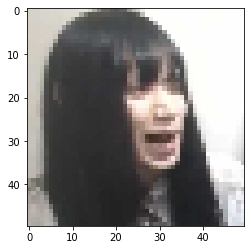

In [7]:
disp_img(path_mao[3])

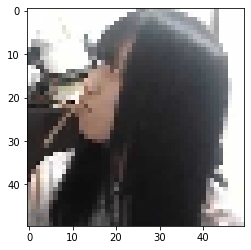

In [8]:
disp_img(path_mao[0])

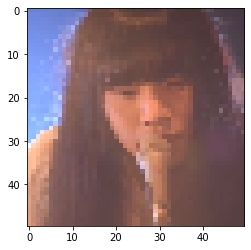

In [9]:
disp_img(path_mao[1])

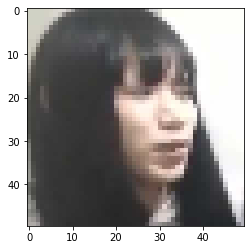

In [10]:
disp_img(path_mao[123])

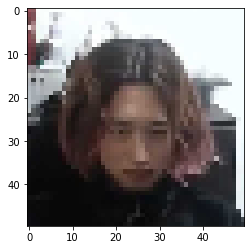

In [11]:
disp_img(path_kitani[3])

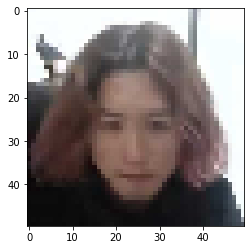

In [12]:
disp_img(path_kitani[0])

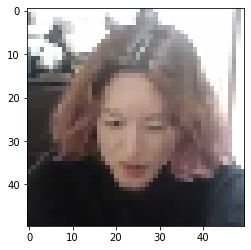

In [13]:
disp_img(path_kitani[34])

## maoデータ拡張

### 回転によるデータ拡張

In [14]:
# データを格納するリスト
mao = []

center = (25, 25)    # 回転の中心を指定
angles = list(range(-20, 21, 1))    # -20~20度の回転
size = (50, 50)

for i in range(len(path_mao)):

    img = cv2.imread(path_mao[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)

    # 回転によってでてくる黒色の背景をなくすために拡大
    for angle in angles:

        if angle <= -10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.3)    # 1.3倍
            img_rotate = cv2.warpAffine(img, trans, size)
            mao.append(img_rotate)

        elif -10 < angle <= 10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.15)    #1.15倍
            img_rotate = cv2.warpAffine(img, trans, size)
            mao.append(img_rotate)

        elif angle > 10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.3)    # 1.3倍
            img_rotate = cv2.warpAffine(img, trans, size)
            mao.append(img_rotate)

In [15]:
# 形状を確認
np.array(mao).shape

(8200, 50, 50, 3)

### 彩度変更によるデータ拡張

In [16]:
# 彩度を0.7倍,1.3倍　8200 x 3(1倍,0.7倍,1.3倍) = 24600に拡張
s = [0.7, 1.3]

for saido in s:
    for i in range(8200):
        img_hsv = cv2.cvtColor(mao[i], cv2.COLOR_RGB2HSV) # RGB -> HSV
        img_hsv[:, :, (1)] = img_hsv[:, :, (1)] * saido  # 彩度を計算
        img_hsv[:, :, (2)] = img_hsv[:, :, (2)] * 1.0  # 明度を計算        
        img_RGB = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
        
        mao.append(img_RGB)

In [17]:
np.array(mao).shape

(24600, 50, 50, 3)

### 明度変更によるデータ拡張

In [18]:
# 明度を0.7倍,1.3倍　24600 x 3(1倍,0.7倍,1.3倍) = 73800に拡張
m = [0.7, 1.3]

for meido in m:
    for i in range(24600):
        img_hsv = cv2.cvtColor(mao[i], cv2.COLOR_RGB2HSV) # RGB -> HSV
        img_hsv[:, :, (1)] = img_hsv[:, :, (1)] * 1.0  # 彩度を計算
        img_hsv[:, :, (2)] = img_hsv[:, :, (2)] * meido  # 明度を計算        
        img_RGB = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
        
        mao.append(img_RGB)

In [19]:
np.array(mao).shape

(73800, 50, 50, 3)

## kitaniデータ拡張

In [20]:
kitani = []

for i in range(len(path_kitani)):

    img = cv2.imread(path_kitani[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)

    for angle in angles:

        if angle <= -10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.3)    # 1.3倍
            img_rotate = cv2.warpAffine(img, trans, size)
            kitani.append(img_rotate)

        elif -10 < angle <= 10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.15)    #1.15倍
            img_rotate = cv2.warpAffine(img, trans, size)
            kitani.append(img_rotate)

        elif angle > 10:
            trans = cv2.getRotationMatrix2D(center, angle, 1.3)    # 1.3倍
            img_rotate = cv2.warpAffine(img, trans, size)
            kitani.append(img_rotate)
            
for saido in s:
    for i in range(4100):
        img_hsv = cv2.cvtColor(kitani[i], cv2.COLOR_RGB2HSV) # RGB -> HSV
        img_hsv[:, :, (1)] = img_hsv[:, :, (1)] * saido  # 彩度を計算
        img_hsv[:, :, (2)] = img_hsv[:, :, (2)] * 1.0  # 明度を計算        
        img_RGB = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
        
        kitani.append(img_RGB)
        
for meido in m:
    for i in range(12300):
        img_hsv = cv2.cvtColor(kitani[i], cv2.COLOR_RGB2HSV) # RGB -> HSV
        img_hsv[:, :, (1)] = img_hsv[:, :, (1)] * 1.0  # 彩度を計算
        img_hsv[:, :, (2)] = img_hsv[:, :, (2)] * meido  # 明度を計算        
        img_RGB = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
        
        kitani.append(img_RGB)

In [21]:
np.array(kitani).shape

(36900, 50, 50, 3)

In [22]:
mao = np.array(mao)
kitani = np.array(kitani)

In [23]:
# maoから7万,kitaniから3万のデータをランダムに選ぶ
id_mao = np.random.randint(len(mao), size=70000)
id_kitani = np.random.randint(len(kitani), size=30000)

mao = mao[id_mao]
kitani = kitani[id_kitani]

In [24]:
print(mao.shape)
print(kitani.shape)

(70000, 50, 50, 3)
(30000, 50, 50, 3)


In [25]:
X = np.vstack([mao, kitani])
X.shape

(100000, 50, 50, 3)

In [26]:
# maoの正解ラベルを1にする
y_mao = np.ones(len(mao))

print(y_mao)
print(y_mao.shape)

[1. 1. 1. ... 1. 1. 1.]
(70000,)


In [27]:
# kitaniの正解ラベルを0にする
y_kitani = np.zeros(len(kitani))

print(y_kitani)
print(y_kitani.shape)

[0. 0. 0. ... 0. 0. 0.]
(30000,)


In [28]:
y = np.concatenate([y_mao, y_kitani])

print(y)
print(y.shape)

[1. 1. 1. ... 0. 0. 0.]
(100000,)


# CNN実装

In [29]:
from sklearn.model_selection import train_test_split
from keras import Sequential, layers
from keras.callbacks import EarlyStopping
from keras.utils import np_utils

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

print(X_train.shape)
print(X_test.shape)

(80000, 50, 50, 3)
(20000, 50, 50, 3)


In [31]:
# 正規化
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# one-hot labeling
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

In [32]:
# メモリが足りないので必要ない変数を削除

import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_"):
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

|            Variable Name|    Memory|
 ------------------------------------ 
|            EarlyStopping|      1064|
|                       In|       352|
|                      Out|       376|
|               Sequential|      1064|
|                        X| 750000144|
|                   X_test| 150000144|
|            X_test_scaled|1200000144|
|                  X_train| 600000144|
|           X_train_scaled|4800000144|
|                    angle|        28|
|                   angles|       488|
|                   center|        72|
|                      cv2|        88|
|                 disp_img|       144|
|                     exit|        64|
|              get_ipython|        72|
|                     glob|        88|
|                        i|        28|
|                id_kitani|    240096|
|                   id_mao|    560096|
|                      img|      7628|
|                  img_RGB|      7628|
|                  img_hsv|      7628|
|               img_rotat

In [33]:
del X, X_test, X_train, id_kitani, id_mao, kitani, mao, y, y_kitani, y_mao, y_test, y_train

In [34]:
cnn = Sequential()

# 50x50x3 -> 50x50x32
cnn.add(layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding="same", activation="relu", input_shape=(50,50,3)))
# 50x50x32 -> 25x25x32
cnn.add(layers.MaxPooling2D(pool_size=(2,2), strides=None))
# 25x25x32 -> 25x25x16
cnn.add(layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding="same", activation="relu"))
cnn.add(layers.Dropout(0.2))
# 25x25x16 -> 22x22x8
cnn.add(layers.Conv2D(8, kernel_size=(4,4), strides=(1,1), padding="valid", activation="relu"))
# 22x22x8 -> 11x11x8
cnn.add(layers.MaxPooling2D(pool_size=(2,2), strides=None, padding="same"))
cnn.add(layers.Dropout(0.2))
# 11x11x8 -> 8x8x4
cnn.add(layers.Conv2D(4, kernel_size=(4,4), strides=(1,1), padding="valid", activation="relu"))
# 8x8x4 -> 4x4x4
cnn.add(layers.MaxPooling2D(pool_size=(2,2), strides=None, padding="same"))

# 4x4x4 -> 64
cnn.add(layers.Flatten())
# 64 -> 32
cnn.add(layers.Dense(32, activation="relu"))
# 32 -> 10
cnn.add(layers.Dense(10, activation="relu"))
# 10 -> 2
cnn.add(layers.Dense(2, activation="softmax"))

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 16)        8208      
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 8)         2056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 8)         0

In [35]:
callbacks = [EarlyStopping(monitor="val_accuracy", patience=5)]

his = cnn.fit(x=X_train_scaled,
              y=y_train_cat,
              epochs=500,
              batch_size=100,
              verbose=1,
              callbacks=callbacks,
              validation_data=(X_test_scaled, y_test_cat))

Epoch 1/500
800/800 [==============================] - 199s 249ms/step - loss: 0.0830 - accuracy: 0.9638 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 2/500
800/800 [==============================] - 197s 247ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 3.2070e-04 - val_accuracy: 1.0000
Epoch 3/500
800/800 [==============================] - 197s 246ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 2.2342e-04 - val_accuracy: 0.9999
Epoch 4/500
800/800 [==============================] - 197s 246ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 2.7696e-04 - val_accuracy: 1.0000
Epoch 5/500
800/800 [==============================] - 198s 248ms/step - loss: 5.3149e-04 - accuracy: 0.9998 - val_loss: 4.1498e-05 - val_accuracy: 1.0000
Epoch 6/500
800/800 [==============================] - 198s 247ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 4.8697e-04 - val_accuracy: 1.0000
Epoch 7/500
800/800 [==============================] - 199s 248ms/step - loss: 2.2538e-04 - ac

## 判別できるか検証

In [36]:
def judge(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (50, 50))
    
    plt.imshow(img)
    plt.show()
    
    img = img.reshape(1, 50, 50, 3)
    img_scaled = img / 255
    
    pred = cnn.predict(img_scaled)    # 予測
    result = np.argmax(pred)    # 0or1に変換
    
    # 1=mao, 0=kitani
    if result == 1:
        print("これは笹川真生")
    else:
        print("これはキタニタツヤ")

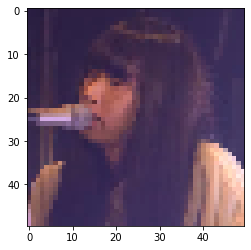

これは笹川真生


In [37]:
judge(path_mao[45])

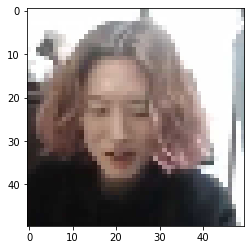

これはキタニタツヤ


In [38]:
judge(path_kitani[98])

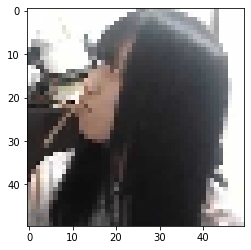

これは笹川真生


In [39]:
judge(path_mao[0])

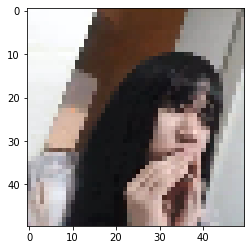

これは笹川真生


In [40]:
judge(path_mao[21])

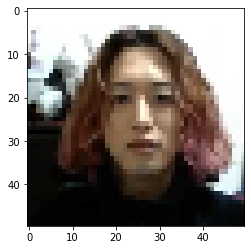

これはキタニタツヤ


In [41]:
judge(path_kitani[55])